In [1]:
# import riquired library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd 
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

c:\Users\kokat\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import the csv file as df
df=pd.read_csv("covid_19.csv")
# to know which column present in data set
df.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [3]:
# to drop the unwanted column from dat set
df=df.drop(columns=['Lat','Long','WHO Region','Province/State'])

In [4]:
# new column after dropped unwanted column
df.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [5]:
# to know null vaues in data set and total null vaues
df.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of               Country/Region        Date  Confirmed  Deaths  Recovered  Active
0                Afghanistan  2020-01-22          0       0          0       0
1                    Albania  2020-01-22          0       0          0       0
2                    Algeria  2020-01-22          0       0          0       0
3                    Andorra  2020-01-22          0       0          0       0
4                     Angola  2020-01-22          0       0          0       0
...                      ...         ...        ...     ...        ...     ...
49063  Sao Tome and Principe  2020-07-27        865      14        734     117
49064                  Yemen  2020-07-27       1691     483        833     375
49065                Comoros  2020-07-27        354       7        328      19
49066             Tajikistan  2020-07-27       7235      60       6028    1147
49067                Lesotho  2020-07-27        505      12        128     365

[49068 rows x 6 col

In [7]:
# to see first five rows of data set
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Albania,2020-01-22,0,0,0,0
2,Algeria,2020-01-22,0,0,0,0
3,Andorra,2020-01-22,0,0,0,0
4,Angola,2020-01-22,0,0,0,0


In [8]:
# convert date format yy-mm-dd
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# to see first 5 rows of data set
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-01-22,0,0,0,0
1,Albania,2020-01-22,0,0,0,0
2,Algeria,2020-01-22,0,0,0,0
3,Andorra,2020-01-22,0,0,0,0
4,Angola,2020-01-22,0,0,0,0


In [10]:
# to find detailed info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Date            49068 non-null  datetime64[ns]
 2   Confirmed       49068 non-null  int64         
 3   Deaths          49068 non-null  int64         
 4   Recovered       49068 non-null  int64         
 5   Active          49068 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.2+ MB


In [11]:
# to find mean,median,std,and max of each column
df.describe()


,Date,Confirmed,Deaths,Recovered,Active
count,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [12]:
# to find total confirmed cases in data set
world_total_confirmed_cases_covid19=df['Confirmed'].sum()
print(f'Total Confirmed COVID-19 Caes in the World=',world_total_confirmed_cases_covid19)
# to find total recovered cases in data set
world_total_recovered_cases_covid19=df['Recovered'].sum()
print(f'Total Recovered COVID-19 Caes in the World=',world_total_recovered_cases_covid19)
# to find total deaths cases in data set
world_total_deaths_cases_covid19=df['Deaths'].sum()
print(f'Total Deaths COVID-19 Caes in the World=',world_total_deaths_cases_covid19)
# to find total active cases in data set
world_total_active_cases_covid19=df['Active'].sum()
print(f'Total Active COVID-19 Caes in the World=',world_total_active_cases_covid19)

Total Confirmed COVID-19 Caes in the World= 828508482
Total Recovered COVID-19 Caes in the World= 388408229
Total Deaths COVID-19 Caes in the World= 43384903
Total Active COVID-19 Caes in the World= 396715350


In [13]:
# to find total cases of covid 19
world_trend = df.groupby('Date')[['Confirmed']]

In [14]:
s=world_total_confirmed_cases_covid19
m=world_total_deaths_cases_covid19
z=world_total_recovered_cases_covid19
k=world_total_active_cases_covid19
print('Total Confirmed Cases =',s)
print('Total Daaths Cases =',m)
print('Total Recover Cases =',z)
print('Total Recover Cases =',k)


Total Confirmed Cases = 828508482
Total Daaths Cases = 43384903
Total Recover Cases = 388408229
Total Recover Cases = 396715350


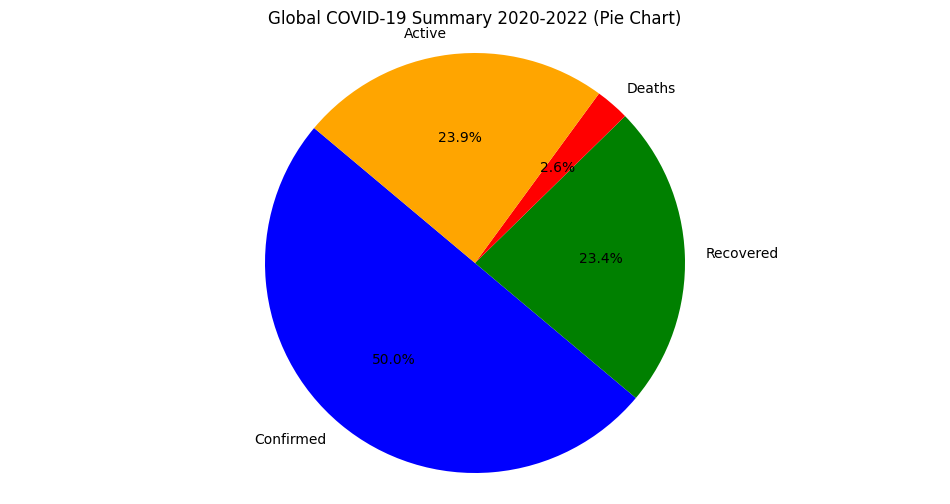

In [15]:
# to show the plot of of world total covid19 
labels = ['Confirmed', 'Recovered', 'Deaths','Active']
sizes = [s, z, m,k]
colors = ['blue', 'green', 'red','orange']
plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Global COVID-19 Summary 2020-2022 (Pie Chart)')
plt.axis('equal')

plt.show()


In [16]:
df["Date"] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayofWeek'] = df['Date'].dt.dayofweek

In [17]:
# to find recover and deaths rate of covid 19 
recovered_rate=(world_total_recovered_cases_covid19/world_total_confirmed_cases_covid19)*100
print('World COVID-19 Recovery Rate=',recovered_rate,'%')
deaths_rate=(world_total_deaths_cases_covid19/world_total_confirmed_cases_covid19)*100
print('World COVID-19 Deaths Rate',deaths_rate,'%')

World COVID-19 Recovery Rate= 46.88041672939686 %
World COVID-19 Deaths Rate 5.23650680018023 %


In [18]:
# creating new data set for new that have only following column,sum of this each column and reset index 
countries_summary = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered','Active']].sum().reset_index()
countries_summary.head(11)

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
5,Antigua and Barbuda,4487,326,2600,1561
6,Argentina,4450658,97749,1680024,2672885
7,Armenia,1587173,27089,857482,702602
8,Australia,960247,11387,711928,236932
9,Austria,2034986,71390,1638380,325216


In [19]:
# to find top 10 country that have high confirmed cases 
countries_confirmed_cases_summary = countries_summary.sort_values(by='Confirmed',ascending=False)
countries_confirmed_cases_summary.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236


In [20]:

confirmed_cases = countries_summary.sort_values(by='Confirmed',ascending=False)
confirmed_cases.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236


C:\Users\kokat\AppData\Local\Temp\ipykernel_18196\1213188081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region',y='Confirmed',data=confirmed_cases.head(10),palette='Blues_d')


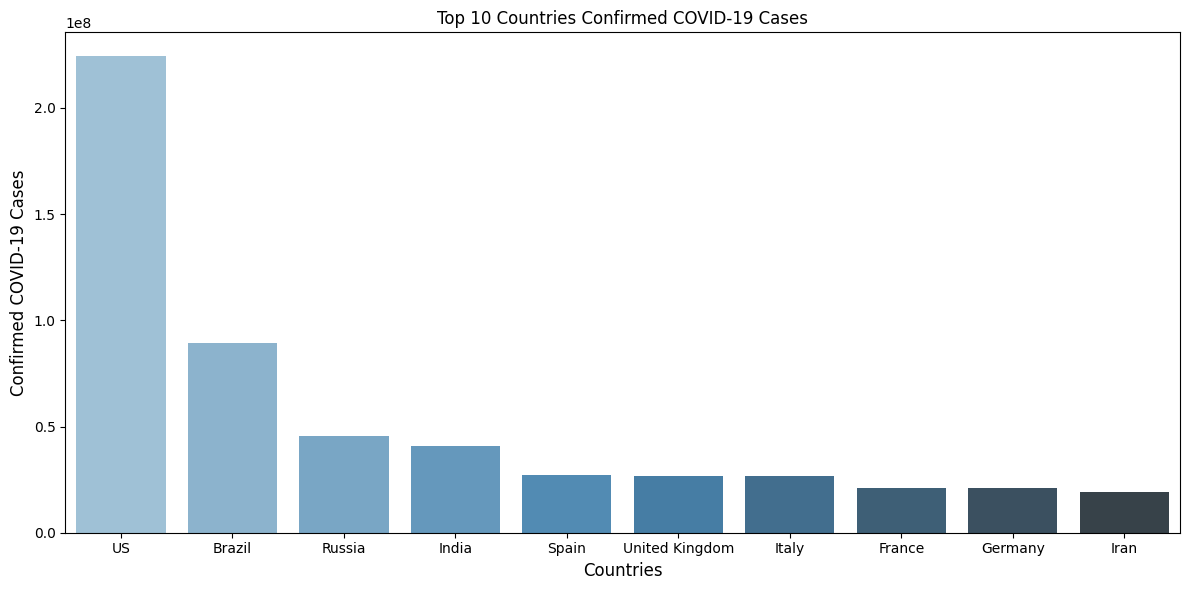

In [21]:
# plot for top 10 country that have hihjer cases
plt.figure(figsize=(12,6))
sns.barplot(x='Country/Region',y='Confirmed',data=confirmed_cases.head(10),palette='Blues_d')
plt.title('Top 10 Countries Confirmed COVID-19 Cases',fontsize=12)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Confirmed COVID-19 Cases',fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
# to find top 10 country have highest deathcases due to covid 19
deaths_cases = countries_summary.sort_values(by='Deaths',ascending=False)
deaths_cases.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
177,United Kingdom,26748587,3997775,126217,22624595
23,Brazil,89524967,3938034,54492873,31094060
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
157,Spain,27404045,3033030,15093583,9277432
111,Mexico,14946202,1728277,11141225,2076700
79,India,40883464,1111831,23783720,15987913
81,Iran,19339267,1024136,15200895,3114236
16,Belgium,6281116,963679,1627492,3689945


In [23]:
top_10_most_deaths_country = deaths_cases.head(10)

C:\Users\kokat\AppData\Local\Temp\ipykernel_18196\1782801258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region',y='Deaths',data=top_10_most_deaths_country,palette='Reds_d')


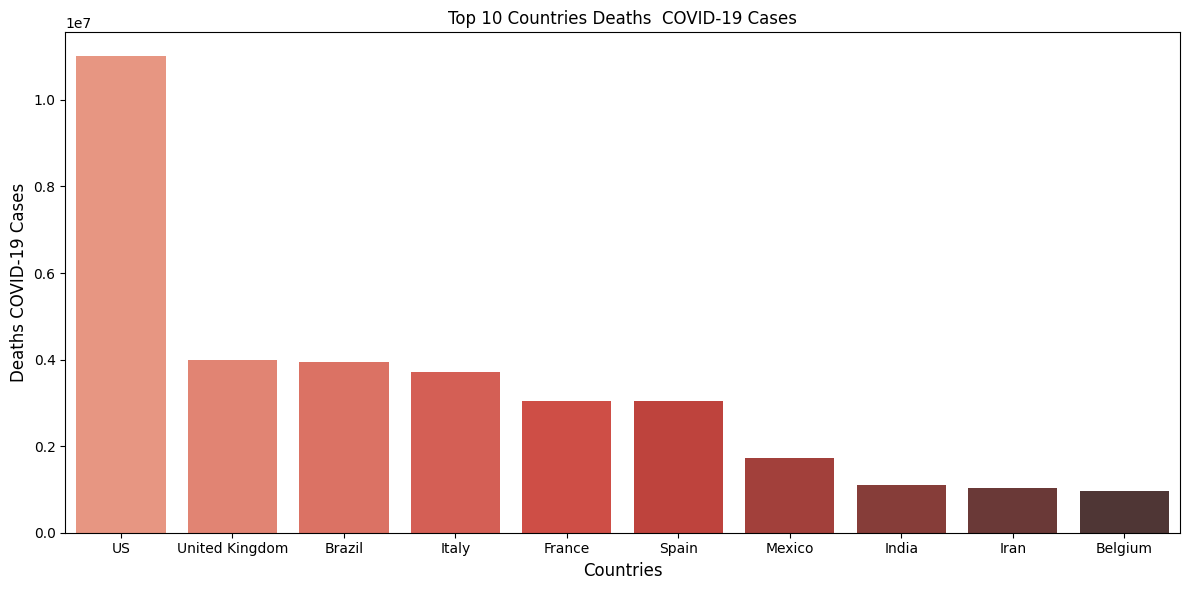

In [24]:
# to show most deaths cases in thw world
plt.figure(figsize=(12,6))
sns.barplot(x='Country/Region',y='Deaths',data=top_10_most_deaths_country,palette='Reds_d')
plt.title('Top 10 Countries Deaths  COVID-19 Cases',fontsize=12)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Deaths COVID-19 Cases',fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
# to find top country have most recovered cases
most_recovred_cases = countries_summary.sort_values(by='Recovered',ascending=False)
most_recovred_cases.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
65,Germany,21059152,871322,17107839,3079991
85,Italy,26745145,3707717,15673910,7363518
81,Iran,19339267,1024136,15200895,3114236
157,Spain,27404045,3033030,15093583,9277432
172,Turkey,17903345,466056,13345389,4091900
35,Chile,16935654,322480,13292593,3320581


In [26]:
top_10_recoverd_cases = most_recovred_cases.head(10)

C:\Users\kokat\AppData\Local\Temp\ipykernel_18196\3423327804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region',y='Recovered',data=top_10_recoverd_cases,palette='Greens_d')


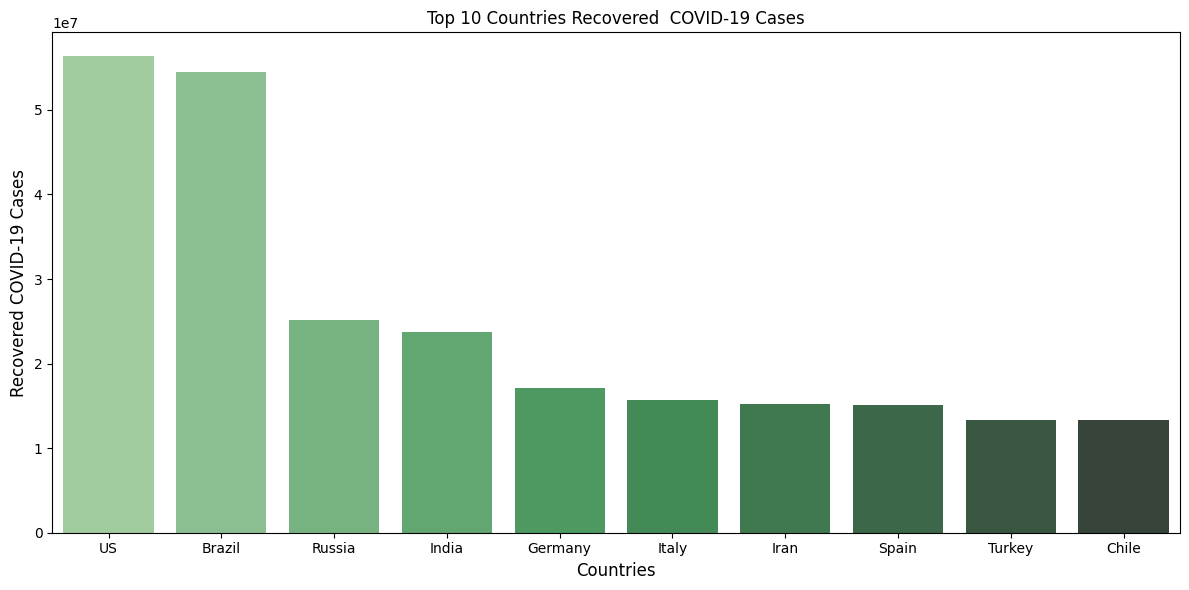

In [27]:
# to find top country that have most recover case
plt.figure(figsize=(12,6))
sns.barplot(x='Country/Region',y='Recovered',data=top_10_recoverd_cases,palette='Greens_d')
plt.title('Top 10 Countries Recovered  COVID-19 Cases',fontsize=12)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Recovered COVID-19 Cases',fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# to find total active cases ij the world
top_countries = df.groupby('Country/Region')['Active'].sum().reset_index
print(top_countries)

<bound method Series.reset_index of Country/Region
Afghanistan           1089052
Albania                 72117
Algeria                345886
Andorra                 19907
Angola                  15011
                       ...   
West Bank and Gaza     170967
Western Sahara            190
Yemen                   25694
Zambia                  43167
Zimbabwe                37706
Name: Active, Length: 187, dtype: int64>


In [29]:
#
countries_confirmed_cases_summary = countries_summary.sort_values(by='Active',ascending=False)
countries_confirmed_cases_summary.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
177,United Kingdom,26748587,3997775,126217,22624595
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
61,France,21210926,3048524,7182115,10980287
157,Spain,27404045,3033030,15093583,9277432
32,Canada,9356551,699566,0,8656985
132,Peru,19263916,652113,10862846,7748957
85,Italy,26745145,3707717,15673910,7363518


In [30]:
# to find most active ative countriwise
most_active_cases = countries_summary.sort_values(by='Active',ascending=False)
most_active_cases.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
177,United Kingdom,26748587,3997775,126217,22624595
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
61,France,21210926,3048524,7182115,10980287
157,Spain,27404045,3033030,15093583,9277432
32,Canada,9356551,699566,0,8656985
132,Peru,19263916,652113,10862846,7748957
85,Italy,26745145,3707717,15673910,7363518


C:\Users\kokat\AppData\Local\Temp\ipykernel_18196\4143646212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active',y='Country/Region',data=most_active_cases.head(10),palette='Oranges_d')


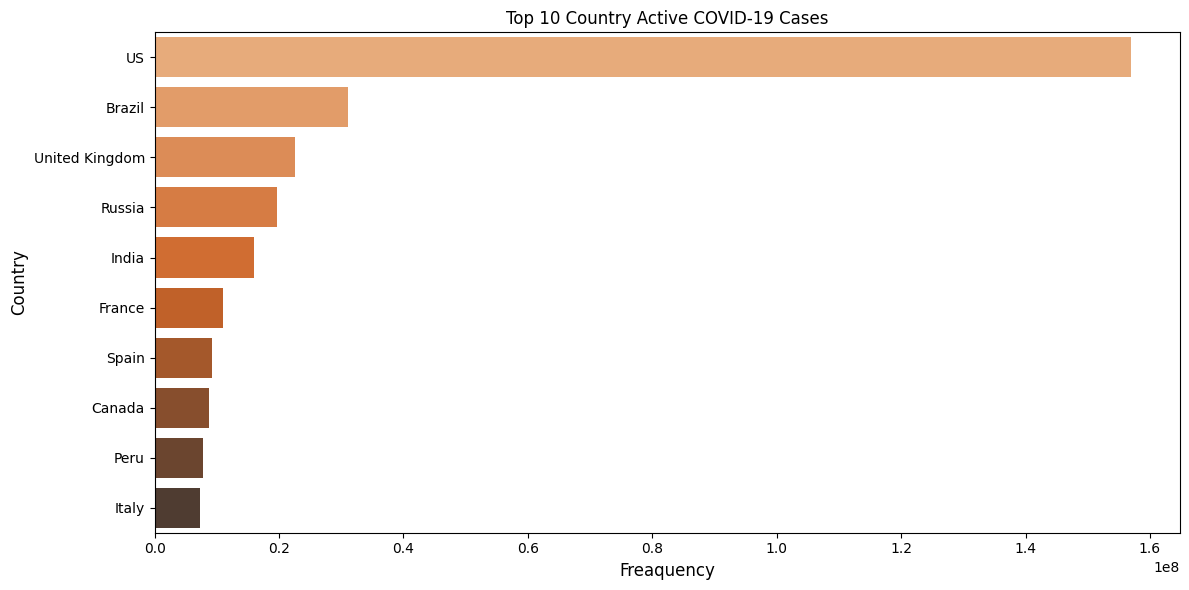

In [45]:
# to find total active cases in the world top 10 country 
plt.figure(figsize=(12,6))
sns.barplot(x='Active',y='Country/Region',data=most_active_cases.head(10),palette='Oranges_d')
plt.title('Top 10 Country Active COVID-19 Cases',fontsize=12)
plt.xlabel('Freaquency',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
# to know the columns
df.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Year', 'Month', 'Day', 'DayofWeek'],
      dtype='object')

In [33]:
# to make new clean csv file to set in ML module
cleaned_csv = df.groupby('Date')[['Confirmed','Deaths','Active','Recovered']].sum().reset_index()
cleaned_csv.head(11)



,Date,Confirmed,Deaths,Active,Recovered
0,2020-01-22,555,17,510,28
1,2020-01-23,654,18,606,30
2,2020-01-24,941,26,879,36
3,2020-01-25,1434,42,1353,39
4,2020-01-26,2118,56,2010,52
5,2020-01-27,2927,82,2784,61
6,2020-01-28,5578,131,5340,107
7,2020-01-29,6166,133,5908,125
8,2020-01-30,8234,171,7922,141
9,2020-01-31,9927,213,9495,219


In [34]:
# to know columns
cleaned_csv.columns

Index(['Date', 'Confirmed', 'Deaths', 'Active', 'Recovered'], dtype='object')

In [35]:
cleaned_csv.tail()

,Date,Confirmed,Deaths,Active,Recovered
183,2020-07-23,15510481,633506,6166006,8710969
184,2020-07-24,15791645,639650,6212290,8939705
185,2020-07-25,16047190,644517,6243930,9158743
186,2020-07-26,16251796,648621,6309711,9293464
187,2020-07-27,16480485,654036,6358362,9468087


In [36]:
cleaned_csv.isnull().sum()

Date         0
Confirmed    0
Deaths       0
Active       0
Recovered    0
dtype: int64

In [37]:
cleaned_csv.info

<bound method DataFrame.info of           Date  Confirmed  Deaths   Active  Recovered
0   2020-01-22        555      17      510         28
1   2020-01-23        654      18      606         30
2   2020-01-24        941      26      879         36
3   2020-01-25       1434      42     1353         39
4   2020-01-26       2118      56     2010         52
..         ...        ...     ...      ...        ...
183 2020-07-23   15510481  633506  6166006    8710969
184 2020-07-24   15791645  639650  6212290    8939705
185 2020-07-25   16047190  644517  6243930    9158743
186 2020-07-26   16251796  648621  6309711    9293464
187 2020-07-27   16480485  654036  6358362    9468087

[188 rows x 5 columns]>

In [38]:

cleaned_csv.head()

,Date,Confirmed,Deaths,Active,Recovered
0,2020-01-22,555,17,510,28
1,2020-01-23,654,18,606,30
2,2020-01-24,941,26,879,36
3,2020-01-25,1434,42,1353,39
4,2020-01-26,2118,56,2010,52


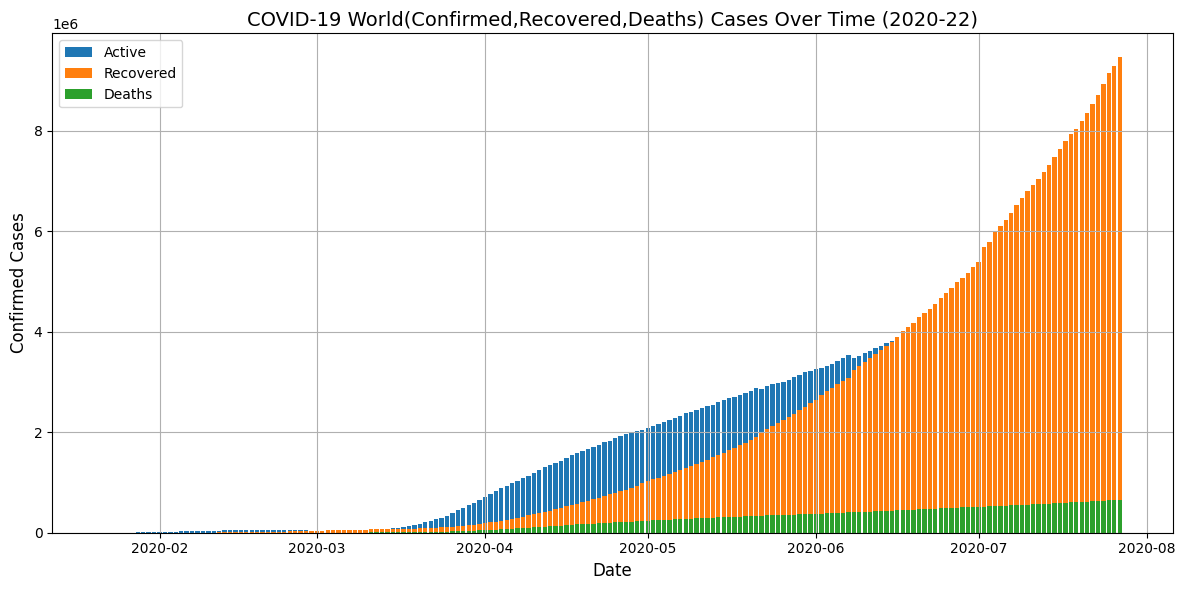

In [39]:
plt.figure(figsize=(12,6))
plt.bar(cleaned_csv['Date'] , cleaned_csv['Active'] , label='Active', linewidth=2)
plt.bar(cleaned_csv['Date'] , cleaned_csv['Recovered'] , label='Recovered', linewidth=2)
plt.bar(cleaned_csv['Date'] , cleaned_csv['Deaths'] , label='Deaths', linewidth=2)
plt.title('COVID-19 World(Confirmed,Recovered,Deaths) Cases Over Time (2020-22)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


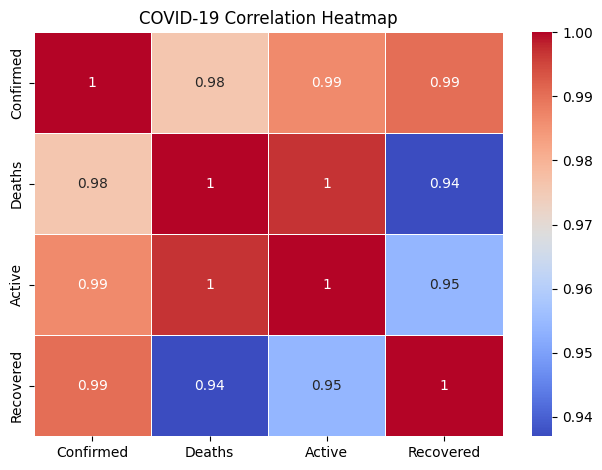

In [40]:
correlation = cleaned_csv.corr(numeric_only=True)
plt.Figure(figsize=(12,6))
sns.heatmap(correlation,annot=True, cmap="coolwarm",linewidths=0.5)
plt.title("COVID-19 Correlation Heatmap")
plt.tight_layout()
plt.show()

In [41]:
cleaned_csv.head()

,Date,Confirmed,Deaths,Active,Recovered
0,2020-01-22,555,17,510,28
1,2020-01-23,654,18,606,30
2,2020-01-24,941,26,879,36
3,2020-01-25,1434,42,1353,39
4,2020-01-26,2118,56,2010,52



 Forecasting Confirmed cases...


14:58:31 - cmdstanpy - INFO - Chain [1] start processing
14:58:31 - cmdstanpy - INFO - Chain [1] done processing


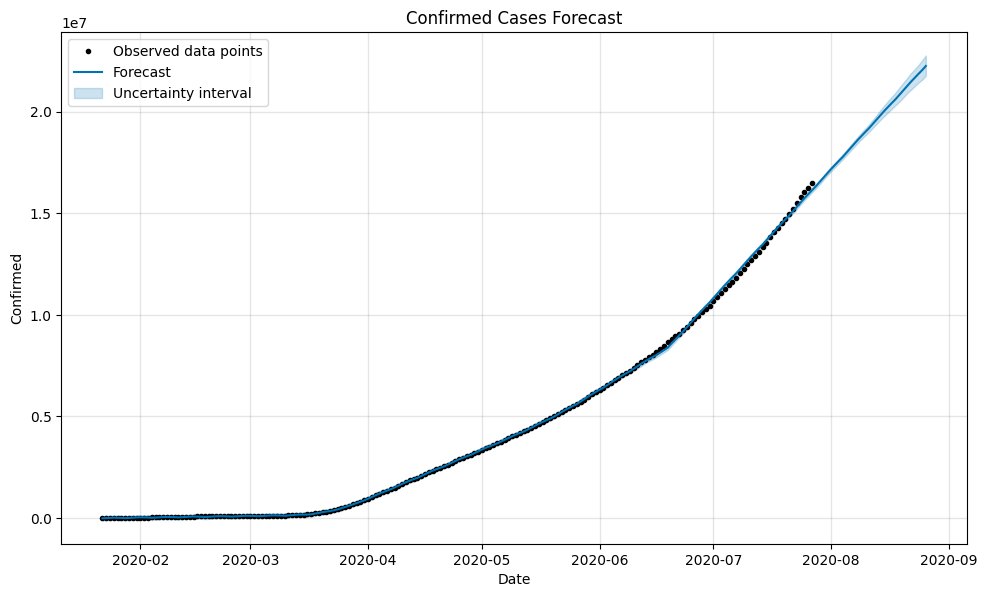


 Forecasting Deaths cases...


14:58:33 - cmdstanpy - INFO - Chain [1] start processing
14:58:33 - cmdstanpy - INFO - Chain [1] done processing


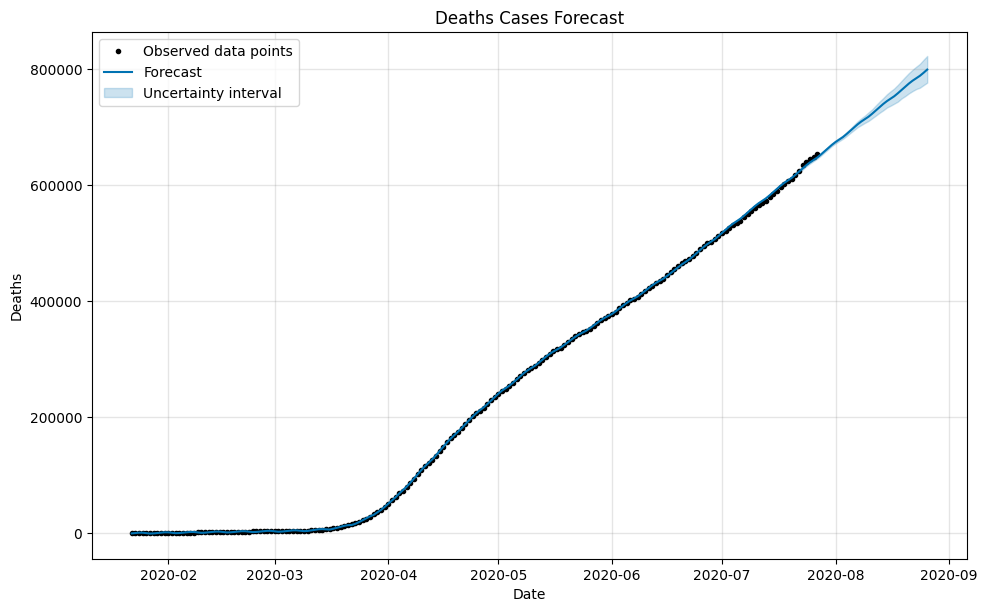


 Forecasting Active cases...


14:58:34 - cmdstanpy - INFO - Chain [1] start processing
14:58:35 - cmdstanpy - INFO - Chain [1] done processing


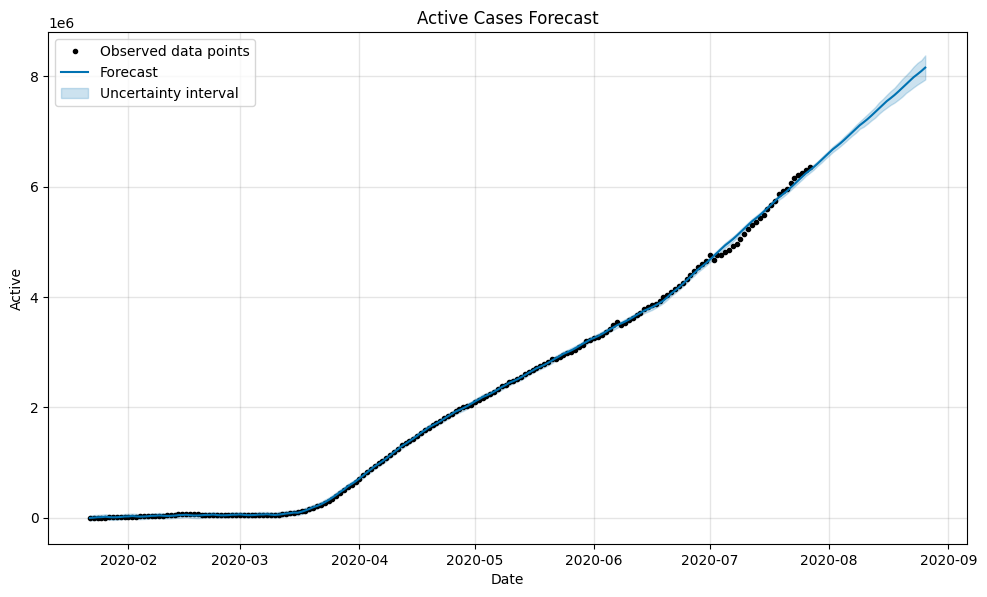


 Forecasting Recovered cases...


14:58:36 - cmdstanpy - INFO - Chain [1] start processing
14:58:36 - cmdstanpy - INFO - Chain [1] done processing


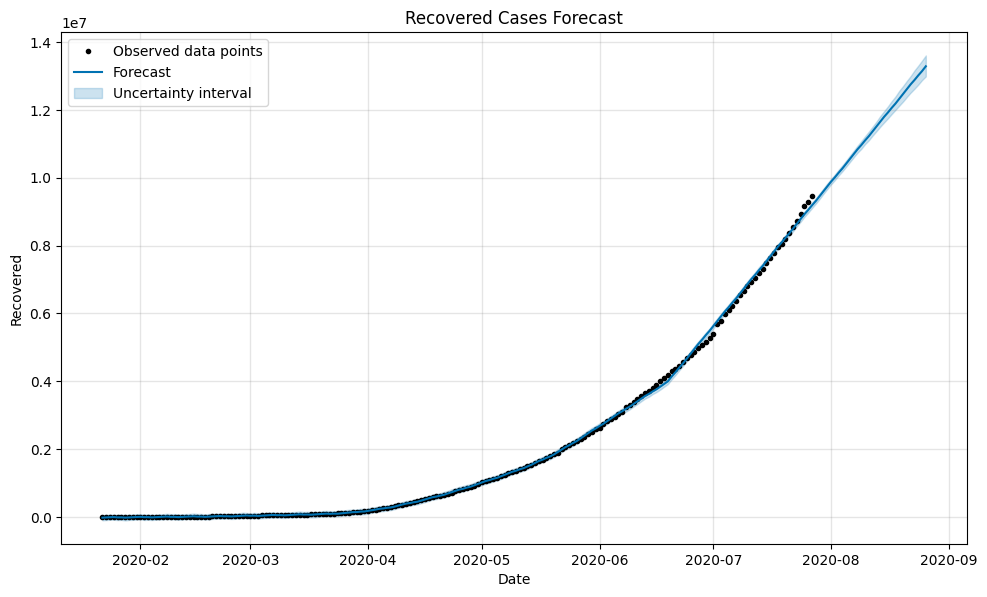

In [46]:
# Columns to forecast
targets = ['Confirmed', 'Deaths', 'Active', 'Recovered']

for target in targets:
    print(f"\n Forecasting {target} cases...")

    # Prepare data for Prophet
    data = cleaned_csv[['Date', target]].rename(columns={'Date': 'ds', target: 'y'})
    data['y'] = pd.to_numeric(data['y'], errors='coerce')
    data.dropna(subset=['ds', 'y'], inplace=True)

    # Skip if not enough valid data
    if len(data) < 20 or data['y'].nunique() < 2 or data['y'].max() == 0:
        print(f"Skipping {target} due to insufficient or invalid data.")
        continue

    # Fit model
    model = Prophet()
    model.fit(data)

    # Predict future 30 days
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Plot
    model.plot(forecast)
    plt.title(f'{target} Cases Forecast')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.show()

   

In [43]:
# Actual values (from original data)
actual_data = df[['Date', 'Confirmed']]  # or 'Deaths', 'Recovered', etc.
actual_data = actual_data.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Predicted values (from Prophet forecast)
predicted_data = forecast[['ds', 'yhat']]

# Merge for comparison
comparison = pd.merge(actual_data, predicted_data, on='ds')

In [44]:
actual = comparison['y']
predicted = comparison['yhat']

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


MAE  : 2050263.57
RMSE : 3314281.12
